In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import matplotlib.pyplot as plt 
%matplotlib inline


import os

import json

import itertools

from pickle import load,dump


In [53]:
with open('raw_dataset', 'rb') as pickle_file:
    X = load(pickle_file)


In [41]:
max_len = 0
min_len = 200
for i in range(0,296):
    if len(X[i]) > max_len:
        max_len = len(X[i])
    elif len(X[i]) < min_len:
        min_len = len(X[i])
        
print(max_len,min_len)

122 20


In [42]:
def pad_frames(squat_sequence):
    
    if len(squat_sequence) ==122:
        return squat_sequence,122
    
    ##first, pad it with zeroes
    size = len(squat_sequence)
    tmp = squat_sequence
    if size < 122:
        remaining = 122 - size
        for i in range(remaining):
            zeroes = [0 for j in range(36)]
            squat_sequence.append(zeroes)
        return squat_sequence,size
    
    

In [49]:
def create_labels(squat,orig_size,flatten_size=4392):
    window = 10
    overlap = 0.5
    upper_bound = int((flatten_size - window) / (overlap * window)) + 1
    print(orig_size, "is the size???")
    st = 36*orig_size-36
    en = 36*(orig_size)
    print(st,en)
    labels = []
    new_squats = []
    
    for i in range(0,upper_bound):
        start = int(i * window * overlap)
        end = start + window
        
        sequence = list(squat[start:end])
        label = (-1,-1,-1)
        if end <= 35:
            label = (1,0,0)
        elif(start >= st and start <=en and end<=en):
            print(start,end)
            label = (0,0,1)
        else:
            label = (0,1,0)
        
        if (start >= st and start <=en and end<=en):
            print(label)
        labels = labels + [label]
        new_squats.append(sequence)
        
    
    return new_squats,labels

In [54]:
windowed_squats = []
new_labels = []
for i in range(0,len(X)):
    
    squat= X[i]
    tt = len(squat)
    padded_squat,size = pad_frames(squat)
    padded_squat = np.array(padded_squat)
    padded_squat = padded_squat.flatten()
    flattened_size = len(padded_squat)
    window_squat,label = create_labels(padded_squat,tt)
    windowed_squats.append(window_squat)
    new_labels.append(label)


56 is the size???
1980 2016
1980 1990
(0, 0, 1)
1985 1995
(0, 0, 1)
1990 2000
(0, 0, 1)
1995 2005
(0, 0, 1)
2000 2010
(0, 0, 1)
2005 2015
(0, 0, 1)
57 is the size???
2016 2052
2020 2030
(0, 0, 1)
2025 2035
(0, 0, 1)
2030 2040
(0, 0, 1)
2035 2045
(0, 0, 1)
2040 2050
(0, 0, 1)
61 is the size???
2160 2196
2160 2170
(0, 0, 1)
2165 2175
(0, 0, 1)
2170 2180
(0, 0, 1)
2175 2185
(0, 0, 1)
2180 2190
(0, 0, 1)
2185 2195
(0, 0, 1)
53 is the size???
1872 1908
1875 1885
(0, 0, 1)
1880 1890
(0, 0, 1)
1885 1895
(0, 0, 1)
1890 1900
(0, 0, 1)
1895 1905
(0, 0, 1)
54 is the size???
1908 1944
1910 1920
(0, 0, 1)
1915 1925
(0, 0, 1)
1920 1930
(0, 0, 1)
1925 1935
(0, 0, 1)
1930 1940
(0, 0, 1)
62 is the size???
2196 2232
2200 2210
(0, 0, 1)
2205 2215
(0, 0, 1)
2210 2220
(0, 0, 1)
2215 2225
(0, 0, 1)
2220 2230
(0, 0, 1)
51 is the size???
1800 1836
1800 1810
(0, 0, 1)
1805 1815
(0, 0, 1)
1810 1820
(0, 0, 1)
1815 1825
(0, 0, 1)
1820 1830
(0, 0, 1)
1825 1835
(0, 0, 1)
50 is the size???
1764 1800
1765 1775
(0, 0,

34 is the size???
1188 1224
1190 1200
(0, 0, 1)
1195 1205
(0, 0, 1)
1200 1210
(0, 0, 1)
1205 1215
(0, 0, 1)
1210 1220
(0, 0, 1)
38 is the size???
1332 1368
1335 1345
(0, 0, 1)
1340 1350
(0, 0, 1)
1345 1355
(0, 0, 1)
1350 1360
(0, 0, 1)
1355 1365
(0, 0, 1)
37 is the size???
1296 1332
1300 1310
(0, 0, 1)
1305 1315
(0, 0, 1)
1310 1320
(0, 0, 1)
1315 1325
(0, 0, 1)
1320 1330
(0, 0, 1)
39 is the size???
1368 1404
1370 1380
(0, 0, 1)
1375 1385
(0, 0, 1)
1380 1390
(0, 0, 1)
1385 1395
(0, 0, 1)
1390 1400
(0, 0, 1)
39 is the size???
1368 1404
1370 1380
(0, 0, 1)
1375 1385
(0, 0, 1)
1380 1390
(0, 0, 1)
1385 1395
(0, 0, 1)
1390 1400
(0, 0, 1)
42 is the size???
1476 1512
1480 1490
(0, 0, 1)
1485 1495
(0, 0, 1)
1490 1500
(0, 0, 1)
1495 1505
(0, 0, 1)
1500 1510
(0, 0, 1)
46 is the size???
1620 1656
1620 1630
(0, 0, 1)
1625 1635
(0, 0, 1)
1630 1640
(0, 0, 1)
1635 1645
(0, 0, 1)
1640 1650
(0, 0, 1)
1645 1655
(0, 0, 1)
39 is the size???
1368 1404
1370 1380
(0, 0, 1)
1375 1385
(0, 0, 1)
1380 1390
(0, 0,

1728 1764
1730 1740
(0, 0, 1)
1735 1745
(0, 0, 1)
1740 1750
(0, 0, 1)
1745 1755
(0, 0, 1)
1750 1760
(0, 0, 1)
38 is the size???
1332 1368
1335 1345
(0, 0, 1)
1340 1350
(0, 0, 1)
1345 1355
(0, 0, 1)
1350 1360
(0, 0, 1)
1355 1365
(0, 0, 1)
41 is the size???
1440 1476
1440 1450
(0, 0, 1)
1445 1455
(0, 0, 1)
1450 1460
(0, 0, 1)
1455 1465
(0, 0, 1)
1460 1470
(0, 0, 1)
1465 1475
(0, 0, 1)
35 is the size???
1224 1260
1225 1235
(0, 0, 1)
1230 1240
(0, 0, 1)
1235 1245
(0, 0, 1)
1240 1250
(0, 0, 1)
1245 1255
(0, 0, 1)
1250 1260
(0, 0, 1)
24 is the size???
828 864
830 840
(0, 0, 1)
835 845
(0, 0, 1)
840 850
(0, 0, 1)
845 855
(0, 0, 1)
850 860
(0, 0, 1)
20 is the size???
684 720
685 695
(0, 0, 1)
690 700
(0, 0, 1)
695 705
(0, 0, 1)
700 710
(0, 0, 1)
705 715
(0, 0, 1)
710 720
(0, 0, 1)
26 is the size???
900 936
900 910
(0, 0, 1)
905 915
(0, 0, 1)
910 920
(0, 0, 1)
915 925
(0, 0, 1)
920 930
(0, 0, 1)
925 935
(0, 0, 1)
23 is the size???
792 828
795 805
(0, 0, 1)
800 810
(0, 0, 1)
805 815
(0, 0, 1)
81

1260 1270
(0, 0, 1)
1265 1275
(0, 0, 1)
1270 1280
(0, 0, 1)
1275 1285
(0, 0, 1)
1280 1290
(0, 0, 1)
1285 1295
(0, 0, 1)
38 is the size???
1332 1368
1335 1345
(0, 0, 1)
1340 1350
(0, 0, 1)
1345 1355
(0, 0, 1)
1350 1360
(0, 0, 1)
1355 1365
(0, 0, 1)
38 is the size???
1332 1368
1335 1345
(0, 0, 1)
1340 1350
(0, 0, 1)
1345 1355
(0, 0, 1)
1350 1360
(0, 0, 1)
1355 1365
(0, 0, 1)
38 is the size???
1332 1368
1335 1345
(0, 0, 1)
1340 1350
(0, 0, 1)
1345 1355
(0, 0, 1)
1350 1360
(0, 0, 1)
1355 1365
(0, 0, 1)
38 is the size???
1332 1368
1335 1345
(0, 0, 1)
1340 1350
(0, 0, 1)
1345 1355
(0, 0, 1)
1350 1360
(0, 0, 1)
1355 1365
(0, 0, 1)
41 is the size???
1440 1476
1440 1450
(0, 0, 1)
1445 1455
(0, 0, 1)
1450 1460
(0, 0, 1)
1455 1465
(0, 0, 1)
1460 1470
(0, 0, 1)
1465 1475
(0, 0, 1)
41 is the size???
1440 1476
1440 1450
(0, 0, 1)
1445 1455
(0, 0, 1)
1450 1460
(0, 0, 1)
1455 1465
(0, 0, 1)
1460 1470
(0, 0, 1)
1465 1475
(0, 0, 1)
38 is the size???
1332 1368
1335 1345
(0, 0, 1)
1340 1350
(0, 0, 1)
1345

25 is the size???
864 900
865 875
(0, 0, 1)
870 880
(0, 0, 1)
875 885
(0, 0, 1)
880 890
(0, 0, 1)
885 895
(0, 0, 1)
890 900
(0, 0, 1)
31 is the size???
1080 1116
1080 1090
(0, 0, 1)
1085 1095
(0, 0, 1)
1090 1100
(0, 0, 1)
1095 1105
(0, 0, 1)
1100 1110
(0, 0, 1)
1105 1115
(0, 0, 1)
45 is the size???
1584 1620
1585 1595
(0, 0, 1)
1590 1600
(0, 0, 1)
1595 1605
(0, 0, 1)
1600 1610
(0, 0, 1)
1605 1615
(0, 0, 1)
1610 1620
(0, 0, 1)
40 is the size???
1404 1440
1405 1415
(0, 0, 1)
1410 1420
(0, 0, 1)
1415 1425
(0, 0, 1)
1420 1430
(0, 0, 1)
1425 1435
(0, 0, 1)
1430 1440
(0, 0, 1)
47 is the size???
1656 1692
1660 1670
(0, 0, 1)
1665 1675
(0, 0, 1)
1670 1680
(0, 0, 1)
1675 1685
(0, 0, 1)
1680 1690
(0, 0, 1)
44 is the size???
1548 1584
1550 1560
(0, 0, 1)
1555 1565
(0, 0, 1)
1560 1570
(0, 0, 1)
1565 1575
(0, 0, 1)
1570 1580
(0, 0, 1)
48 is the size???
1692 1728
1695 1705
(0, 0, 1)
1700 1710
(0, 0, 1)
1705 1715
(0, 0, 1)
1710 1720
(0, 0, 1)
1715 1725
(0, 0, 1)
52 is the size???
1836 1872
1840 1850


In [38]:
print(len(new_labels))

296


In [59]:
new_labels[0][395:403]

[(0, 1, 0),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 1, 0)]

In [60]:
tmp_label = np.array(new_labels)

In [61]:
tmp_label.shape

(296, 877, 3)

In [62]:
tmp_squats = np.array(windowed_squats)

In [63]:
tmp_squats.shape

(296, 877, 10)

In [93]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(tmp_squats, tmp_label, test_size=0.1, random_state=42)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)

In [94]:
train_data.shape

(239, 877, 10)

In [116]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define model architecture
model = Sequential()
model.add(LSTM(units=64, input_shape=(877, 10),  return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model

res = model.fit(train_data, train_labels, epochs=5, batch_size = 10, validation_data=(val_data,val_labels))


Epoch 1/5
24/24 [==============================] - 15s 406ms/step - loss: 0.5975 - accuracy: 0.9224 - val_loss: 0.0694 - val_accuracy: 0.9872
Epoch 2/5
24/24 [==============================] - 8s 348ms/step - loss: 0.0664 - accuracy: 0.9870 - val_loss: 0.0579 - val_accuracy: 0.9872
Epoch 3/5
24/24 [==============================] - 8s 342ms/step - loss: 0.0609 - accuracy: 0.9870 - val_loss: 0.0554 - val_accuracy: 0.9872
Epoch 4/5
24/24 [==============================] - 8s 350ms/step - loss: 0.0587 - accuracy: 0.9870 - val_loss: 0.0533 - val_accuracy: 0.9872
Epoch 5/5
24/24 [==============================] - 8s 351ms/step - loss: 0.0566 - accuracy: 0.9870 - val_loss: 0.0518 - val_accuracy: 0.9872


In [69]:
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


1/1 [==============================] - 1s 636ms/step - loss: 0.0557 - accuracy: 0.9869
Test loss: 0.05568818747997284
Test accuracy: 0.9868870973587036


In [107]:
train_loss = res.history['loss']
val_loss = res.history['val_loss']
epochs = range(1, len(train_loss) + 1)

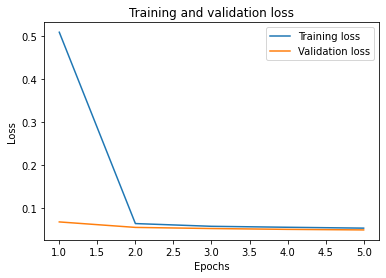

In [111]:
plt.plot(epochs,train_loss, label='Training loss')
plt.plot(epochs,val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [102]:
val_loss

[0.0722210481762886,
 0.05482039228081703,
 0.05274007096886635,
 0.05122867226600647,
 0.04830668866634369]

In [84]:
from sklearn.model_selection import KFold

# Define the number of folds
n_folds = 5

# Define the input data and labels
data = np.array(train_data)
labels = np.array(train_labels)

# Define the KFold object
kf = KFold(n_splits=n_folds)
loss_vals = []
acc_vals = []
# Loop over the folds
fold = 1
for train_idx, val_idx in kf.split(data):
    
    print(f'Fold {fold}:')
    
    # Define the training and validation data and labels for this fold
    train_data_fold = data[train_idx]
    train_labels_fold = labels[train_idx]
    val_data_fold = data[val_idx]
    val_labels_fold = labels[val_idx]
    
    # Define and train the model
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(877, 10),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(units=3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(train_data_fold, train_labels_fold, epochs=3, batch_size=10, verbose=0)
    
    # Evaluate the model on the validation set
    loss, acc = model.evaluate(val_data_fold, val_labels_fold, verbose=0)
    print(f'Validation accuracy: {acc}')
    loss_vals.append(loss)
    acc_vals.append(acc)
    fold += 1


Fold 1:
Validation accuracy: 0.9870138168334961
Fold 2:
Validation accuracy: 0.9869194030761719
Fold 3:
Validation accuracy: 0.9870484471321106
Fold 4:
Validation accuracy: 0.9870699644088745
Fold 5:
Validation accuracy: 0.9869624376296997


In [81]:
print("Mean loss: ", sum(loss_vals)/len(loss_vals))
print("Mean accuracy: ",sum(acc_vals)/len(acc_vals) )

Mean loss:  0.054473770409822465
Mean accuracy:  0.9870070338249206


In [82]:
print(acc_vals)
print(loss_vals)

[0.9870349168777466, 0.9869194030761719, 0.9870484471321106, 0.9870699644088745, 0.9869624376296997]
[0.05703297629952431, 0.0551399290561676, 0.055370498448610306, 0.05299293249845505, 0.05183251574635506]


In [131]:
def convert_label_to_int(label):
    if label[0] == 1:
        return 0
    elif label[1] == 1:
        return 1
    return 2

In [143]:
def convert_prediction_to_int(predictions):
    return list(predictions).index(max(list(predictions)))

In [176]:
from sklearn.metrics import classification_report

# predict on test data
y_pred = model.predict(test_data)



In [170]:
converted_labels= [convert_label_to_int(label)for labels in test_labels for label in labels]

In [174]:
converted_preds = [convert_prediction_to_int(label) for labels in y_pred for label in labels]

In [175]:
report = classification_report(converted_labels, converted_preds)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.99      1.00      0.99     25965
           2       0.00      0.00      0.00       165

    accuracy                           0.99     26310
   macro avg       0.33      0.33      0.33     26310
weighted avg       0.97      0.99      0.98     26310



/home/tudor/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tudor/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tudor/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
class_weights = dict(zip(range(3), np.sum(train_labels, axis=0) / len(train_labels)))

In [183]:
class_weights


{0: array([1., 0., 0.]), 1: array([1., 0., 0.]), 2: array([1., 0., 0.])}

In [206]:
dummy_train_labels = np.array([convert_label_to_int(label)for labels in train_labels for label in labels])
dummy_train_labels = dummy_train_labels.reshape(239,-1)
shp = val_labels.shape[0]
dummy_val_labels = np.array([convert_label_to_int(label)for labels in val_labels for label in labels])
dummy_val_labels = dummy_val_labels.reshape(shp,-1)


In [225]:
print(np.unique(dummy_val_labels))

[0 1 2]


In [224]:
dummy_train_labels.shape

(239, 877)

In [228]:
dummy_val_labels.shape

(27, 877)

In [229]:
train_data.shape

(239, 877, 10)